### Goal
- Input: RGB image.
- Teacher: Depth Anything V2 → predicts a high-quality depth map.
- Student: A smaller, faster model → learns to mimic the teacher’s depth map predictions.

In [37]:
import torch
from torch import nn

import torchvision
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import numpy as np
import os

In [47]:
class DepthDataset(torch.utils.data.Dataset):
    def __init__(self, images_dir, depth_maps_dir, transform=None):
        self.images_dir = images_dir
        self.depth_maps_dir = depth_maps_dir
        self.transform = transform
        
        self.files = [f for f in os.listdir(images_dir) if f.lower().endswith('.png')]
        
    def __len__(self):
        return len(self.files)
    
    def __getitem__(self, idx):
        image_path = os.path.join(self.images_dir, self.files[idx])
        depth_map_path = os.path.join(self.depth_maps_dir, self.files[idx])
        
        image = plt.imread(image_path)
        depth_map = plt.imread(depth_map_path)[:,:,0]
        
        if self.transform:
            image = self.transform(image)
            depth_map = self.transform(depth_map)

        return image, depth_map

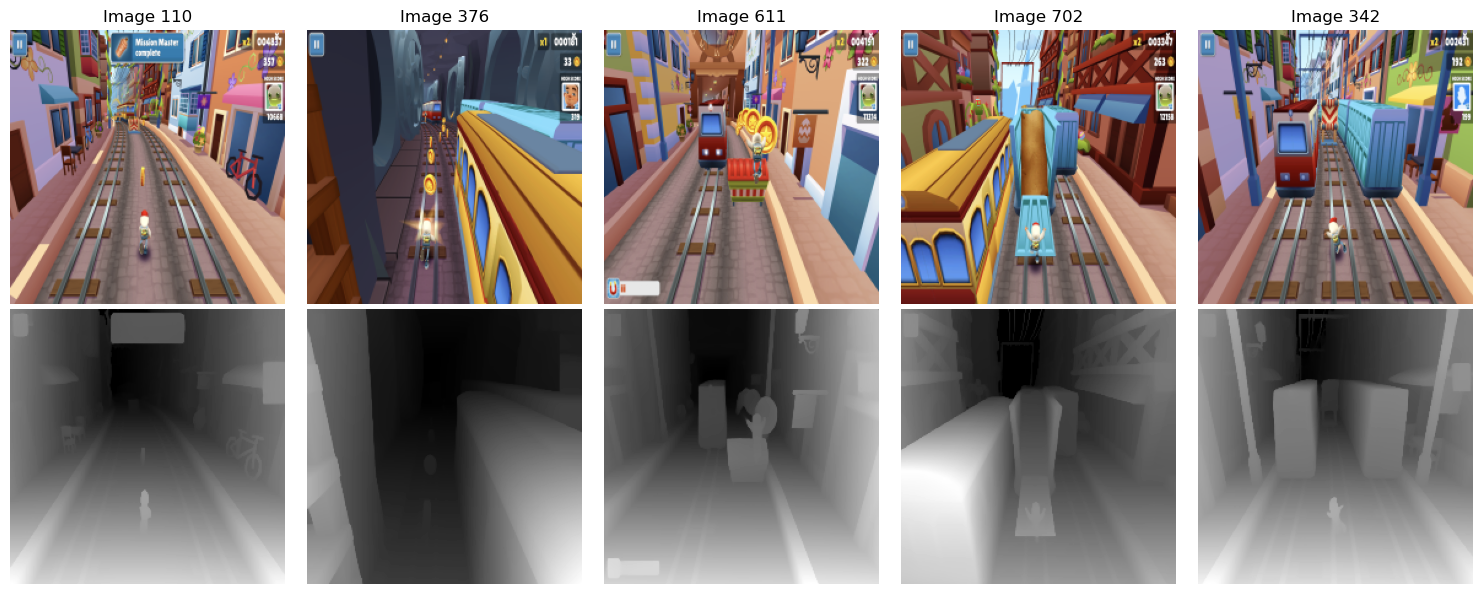

In [54]:
dataset = DepthDataset(
    images_dir='data/depth_data/images',
    depth_maps_dir='data/depth_data/depth_maps',
    transform=ToTensor(),
)

# Create a figure with 2 rows and 5 columns
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Get 5 random samples from the dataset
indices = np.random.choice(len(dataset), 5, replace=False)

for i, idx in enumerate(indices):
    # Get image and depth map
    image, depth_map = dataset[idx]
    
    # Convert tensors back to numpy for plotting
    if isinstance(image, torch.Tensor):
        image = image.permute(1, 2, 0).numpy()
    if isinstance(depth_map, torch.Tensor):
        depth_map = depth_map.numpy().squeeze()
    
    # Plot RGB image in first row
    axes[0, i].imshow(image)
    axes[0, i].set_title(f'Image {idx}')
    axes[0, i].axis('off')
    
    # Plot depth map in second row
    axes[1, i].imshow(depth_map, cmap='gray')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
torch.manual_seed(42)
train, test = torch.utils.data.random_split(dataset, [0.8, 0.2])
train.__len__(), test.__len__()

(torch.Size([3, 224, 224]), torch.Size([1, 224, 224]))

In [57]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True)

images, depth_maps = next(iter(dataloader))
print(f'Batch of images shape: {images.shape}')
print(f'Batch of depth maps shape: {depth_maps.shape}')

Batch of images shape: torch.Size([16, 3, 224, 224])
Batch of depth maps shape: torch.Size([16, 1, 224, 224])
